<a href="https://colab.research.google.com/github/uzeziogho/MLDM/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
#Run before importing KMeans
import os
os.environ["OMP_NUM_THREADS"]='1'

#Importing the dataset
eshopData=pd.read_csv('/content/ENB2012_data.csv')

In [2]:
eshopData.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [3]:
eshopData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    float64
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    float64
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(10)
memory usage: 101.4 KB


In [14]:
eshopData = eshopData.dropna(how='any',axis=0) 
eshopData.isnull().any()

Relative Compactness         False
Surface Area                 False
Wall Area                    False
Roof Area                    False
Overall Height               False
Orientation                  False
Glazing Area                 False
Glazing Area Distribution    False
Heating Load                 False
Cooling Load                 False
dtype: bool

In [15]:
eshopData.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


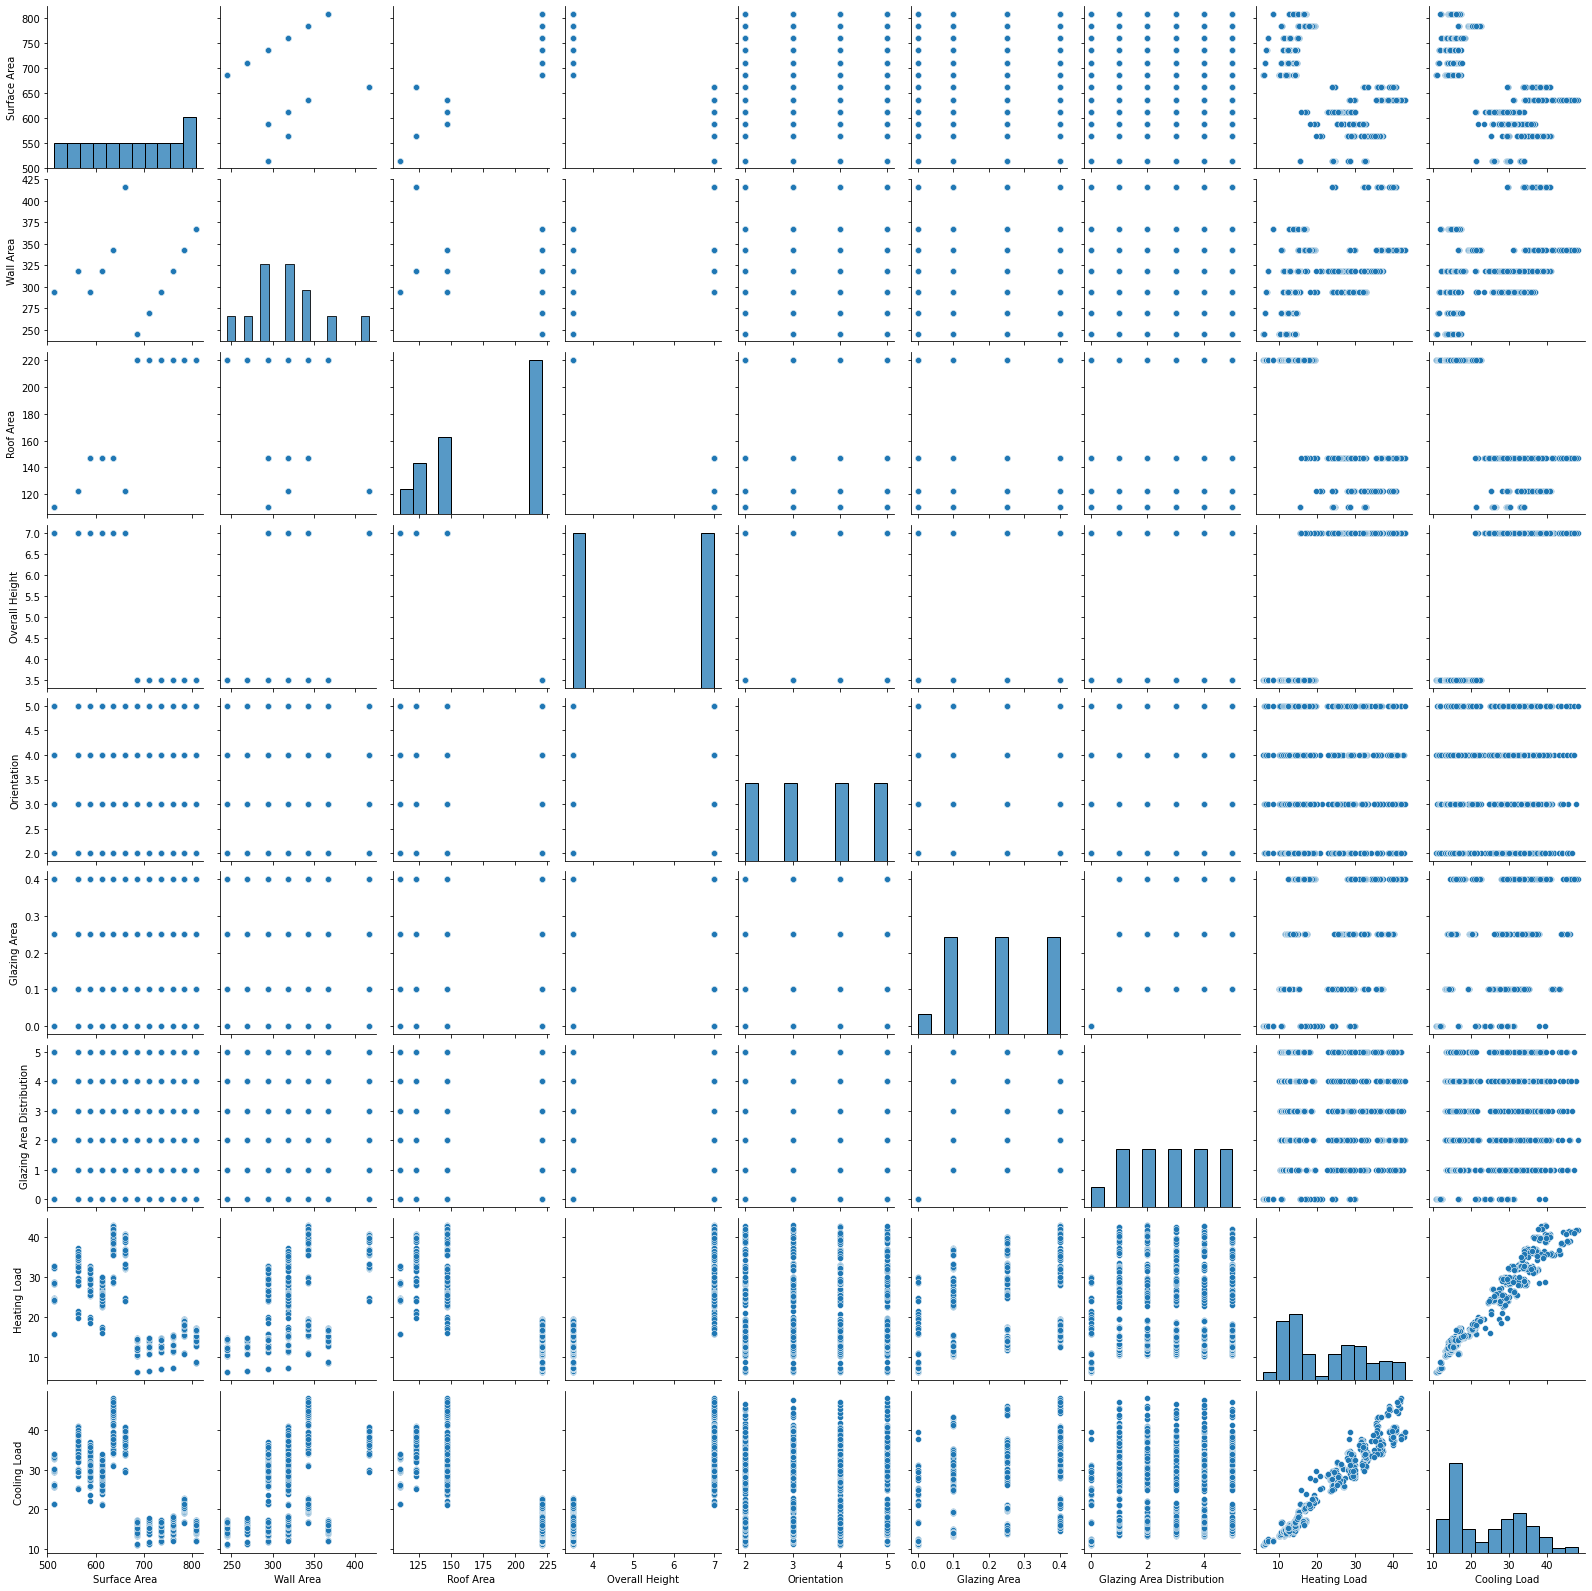

In [16]:
X=eshopData.iloc[:,1:10]
sns.pairplot(X)
#sns.pairplot(eshopData.iloc[:,[1:10]])

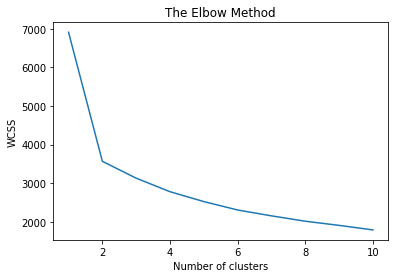

In [17]:
# KMeans Clustering
from pandas.core.common import random_state
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Scale the data
sc_X=StandardScaler()
X=sc_X.fit_transform(X)
#X=eshopData.iloc[:,[3,5]].values


#Using the elbow method to find the optimal number of clusters
wcss=[]
for i in range (1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
#Fitting K-Means to the dataset
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

In [20]:
# We need to reduce dimensionality before we can visualise
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.50355791, 0.14499705])

In [21]:
sum(pca.explained_variance_ratio_)

0.6485549608941836

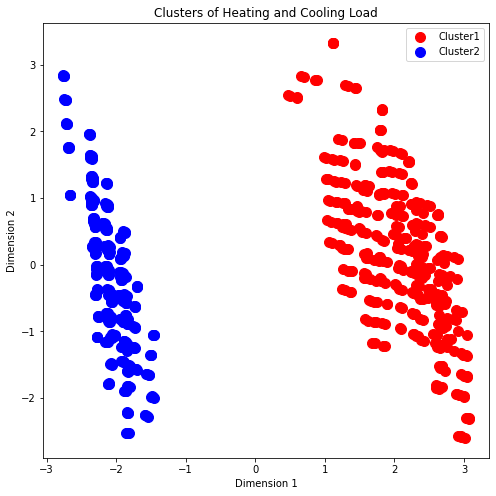

In [23]:
#Visualising the clusters

colours=['red','blue']

plt.figure(figsize=(8,8))
for i in range(2):
  plt.scatter(X_reduced[y_kmeans==i,0],X_reduced[y_kmeans==i,1],s=100,c=colours[i],label='Cluster'+str(i+1))
plt.title('Clusters of Heating and Cooling Load')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


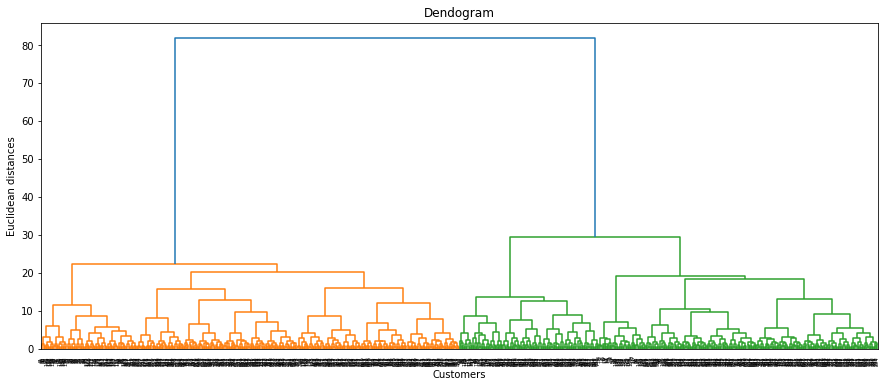

In [24]:
from seaborn.matrix import dendrogram
#Using Dendogram to find the optimal number of clusters


import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [27]:
#Fitting Hierarchical Clustering to the dataset

from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

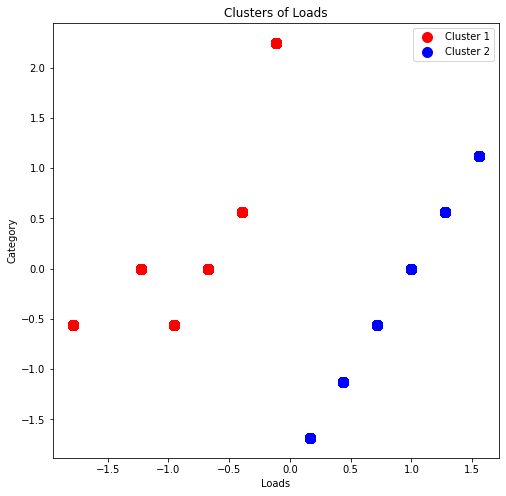

In [28]:
#Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='Cluster 2')
#plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='Cluster 3')
#plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label='Cluster 4')
plt.title('Clusters of Loads')
plt.xlabel('Loads')
plt.ylabel('Category')
plt.legend()
plt.show()

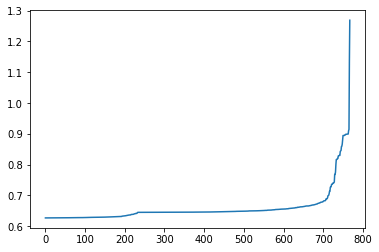

In [29]:
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors

neighbours=NearestNeighbors(n_neighbors=2)
distances,indices=neighbours.fit(X).kneighbors(X)

distances=distances[:,1]
distances=np.sort(distances,axis=0)
plt.plot(distances)

In [30]:
#from sklearn.cluster import DBSCAN

#dbscan = DBSCAN(eps=0.25,min_samples=2)
#y_dbscan=dbscan.fit_predict(X)

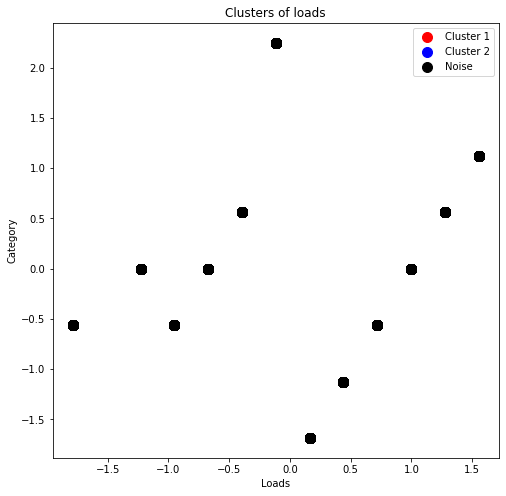

In [31]:
#plt.figure(figsize=(8,8))
#plt.scatter(X[y_dbscan==0,0],X[y_dbscan==0,1],s=100,c='red',label='Cluster 1')
#plt.scatter(X[y_dbscan==1,0],X[y_dbscan==1,1],s=100,c='blue',label='Cluster 2')
#plt.scatter(X[y_dbscan==2,0],X[y_dbscan==2,1],s=100,c='green',label='Cluster 3')
#plt.scatter(X[y_dbscan==3,0],X[y_dbscan==3,1],s=100,c='cyan',label='Cluster 4')
#plt.scatter(X[y_dbscan==-1,0],X[y_dbscan==-1,1],s=100,c='black',label='Noise')
#plt.title('Clusters of loads')
#plt.xlabel('Loads')
#plt.ylabel('Category')
#plt.legend()
#plt.show()